# Biolog acs-2 screen

In [2]:
%matplotlib inline
import os
import sys
import tifffile as tiff
import pandas as pd
import matplotlib
# For visualising
#matplotlib.use('MacOSX') 
# For saving
#matplotlib.use('Agg') 
matplotlib.use('MacOSX') #TkAgg
import matplotlib.pyplot as plt

import numpy as np
import itertools as IT
import time
import glob
import skimage
from skimage import io as skio
from skimage import color

import cPickle
import gzip

import datetime
from multiprocessing import Pool, Manager
from multiprocessing.sharedctypes import Value, Array
from ctypes import Structure, c_double, c_int

sys.path.append("./src")
from utilities import *

#plt.interactive(True)
matplotlib.rcParams.update({'font.size': 12})
np.set_printoptions(precision=3)

In [3]:
os.chdir("/Users/Povilas/Dropbox/Projects/Metformin_Celegans_Biolog")
sourceloc = "/Users/Povilas/Dropbox/Projects/Metformin_Celegans_Biolog"

# os.chdir("/home/pnorv/Dropbox/Projects/Metformin_TF_acs-2/")
# sourceloc = "home/pnorv/Dropbox/Projects/Metformin_TF_acs-2/"

odir="."

In [4]:
filedata=[]
header=['Replicate_folder','Folder','File']
filedata.append(header)

allfiles=glob.glob('./Rep*/*/*.tif')

for fl in allfiles:
    rep,plate,fln=fl.split('/')[1:]
    filedata.append([rep,plate,fln])
    #print rep, fld, fln
    
writecsv(filedata,'Allfiles.csv')

/usr/local/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from uint16 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


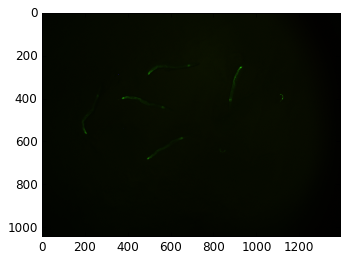

In [5]:
### Load image
fl=allfiles[0]

image = skimage.img_as_ubyte(tiff.imread(fl))

imghsv = color.rgb2hsv(image)
imgrgb = img_as_float(image)


gray = color.rgb2gray(image)
image_rescale=exposure.rescale_intensity(image)

#Image dimensions
image.shape

### Label worms
image_jet=jetimage(gray)

#plt.imshow(image_jet)
v = imghsv[:, :, 2]

#Save image
#skio.imsave('{}_{}_{}_adjusted_RGB.tiff'.format(rep,fol,fil),jetimage(comb))
plt.imshow(image)

## Collect images

In [6]:
#filelist=pd.read_csv('./Allfiles_annotated.csv')

oimages="Images.pkl"
iimagesgz="Images.pkl.gz"
#oimagesgz="Images.pkl.gz"

In [ ]:
settings={'colordepth':'uint8'}
args=[(fl,settings,) for fl in allfiles]

results=multiprocessor(4,collector_M,args)

fls,imagesarray=zip(*results)

imagesindex={fl:fli for fli,fl in enumerate(fls) }

print("Saving images: {}".format(time.ctime()))
print "Stacking..."
images=np.stack(imagesarray, axis=0)
print "Done!"

f = open(oimages, "w")
#f = gzip.open(oimagesgz, "w")
print "Writing..."
cPickle.dump((imagesindex,images), f)
f.close()
os.system("gzip {}".format(oimages))
print("Saving images complete!")

/usr/local/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
/usr/local/lib/python2.7/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


Done   1%,    25/1800  remaining: 0:05:55 total: 0:06:00
Done   3%,    56/1800  remaining: 0:05:11 total: 0:05:21
Done   4%,    87/1800  remaining: 0:04:55 total: 0:05:10
